In [1]:
import os
os.getcwd()
os.chdir('..')
import nn_training.optimizers as optim
import nn_training.experiment_objectives as object_fun

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nn_training.data_utils as utils
dataset = utils.UniformDistribution(1, -4, 4)

In [3]:
optimizer = optim.DiffEvolution(
    optimized_func=object_fun.polynomial_func,
    dataset = dataset,
    population_size = 100
)

In [4]:
experiment = optimizer.optimize(
    experiment_name = 'test',
    in_channels = 1,
    n_hidden_neurons = 10,
    out_channels = 1,
    f_factor = 0.5,
    min_f_factor=0.01,
    n_iters=1000,
    best_loss_treshold=1e-10,
    probe_times=20,
    gamma=1
)

Epoch 999 loss = 0.0020121720730038216

In [5]:
x = [ i for _, i in zip(range(1000), dataset)]
y = [ object_fun.polynomial_func(i) for i in x]
yp = [ experiment.best_individual.predict(i) for i in x]

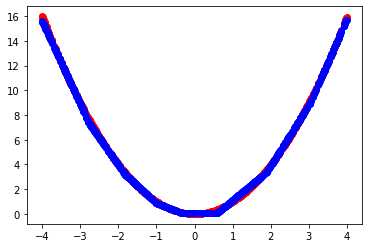

In [6]:
plt.scatter(x, y, color='red')
plt.scatter(x, yp, color='blue')

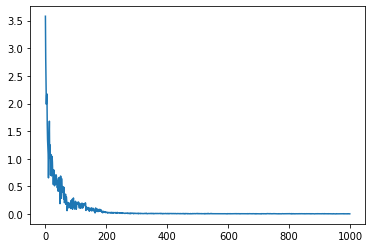

In [7]:
min_losses = [min(i) for i in experiment.losses_per_epoch]
plt.plot(range(len(experiment.losses_per_epoch)), min_losses)